In [1]:
import math
import wandb
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from copy import deepcopy
from ptflops import get_model_complexity_info
import torch

In [2]:
def get_log_from_id(run_id, project="YOLOv3", metric=["metrics/recall", "metrics/precision"]):
    api = wandb.Api()

    # run is specified by <entity>/<project>/<run id>
    run = api.run(f"jtiger958/{project}/{run_id}")

    # save the metrics for the run to a csv file
    metrics_dataframe = run.history()
    metrics_dataframe["score"] = 0
    
    for m in metric:
        metrics_dataframe["score"] += metrics_dataframe[m] / len(metric)

    idx = metrics_dataframe[["score"]].idxmax()

    return deepcopy(metrics_dataframe.iloc[idx])

In [3]:
wandb_runs = (
    ("2tdc8057", "YOLOv3", "yolov3", "6.5"),
    ("a5uw4fnq", "YOLOv5", "yolov5n", "1.9"),
    ("degov9vd", "YOLOv5", "yolov5s", "7.2"),
    ("2ppeifeo", "YOLOv5", "yolov5m", "21.2"),
    ("36axmmcg", "YOLOv5", "yolov5l", "46.5"),
    ("3tgu7cpv", "YOLOv5", "yolov5x", "86.7"),
    ("2obegckz", "YOLOv5", "yolov5n6", "3.2"),
    ("cgoqvim0", "YOLOv5", "yolov5s6", "12.6"),
    ("1kj3j48m", "YOLOv5", "yolov5m6", "35.7"),
    ("zudq2ki6", "YOLOv5", "yolov5l6", "76.8"),
)

result = [(get_log_from_id(run_id, project), model, param) for run_id, project, model, param in wandb_runs]

In [4]:
def sort_and_plot(result, key):
    import matplotlib
    matplotlib.use('TkAgg')
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    model_name = []
    minimum = float("inf")
    maximum = -1.1
    result.sort(key=lambda x: float(x[0][key]))

    for i, (df, model, _) in enumerate(result):
        minimum = min(minimum, float(df[key]))
        maximum = max(maximum, float(df[key]))
        plt.barh(i, df[key])
        model_name += [model]

    plt.title(key)
    plt.yticks(range(len(model_name)), model_name)
    plt.xlim([minimum * 0.999, maximum * 1.001])
    plt.show()

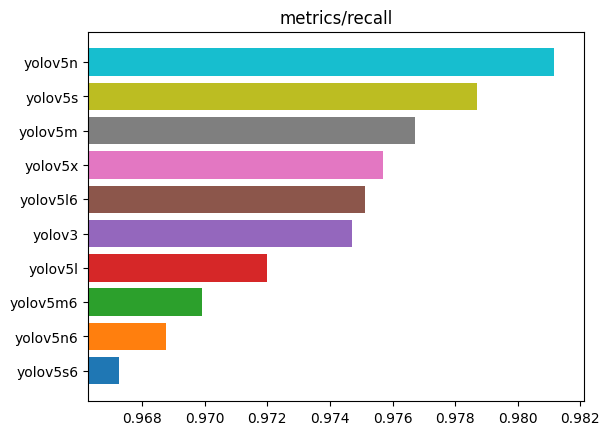

In [5]:
sort_and_plot(result, "metrics/recall")

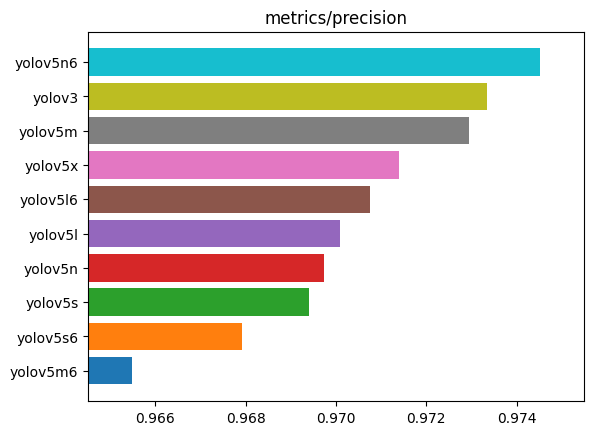

In [6]:
sort_and_plot(result, "metrics/precision")

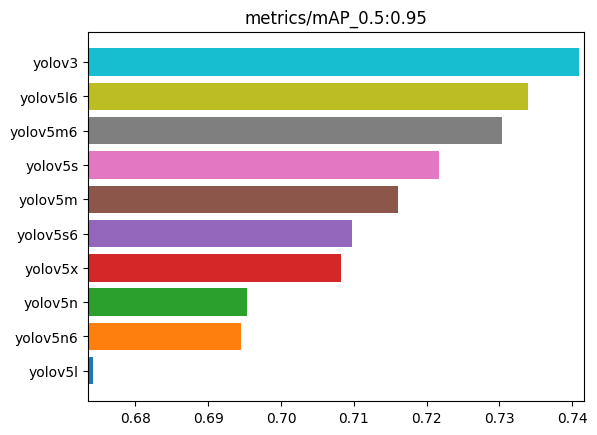

In [7]:
sort_and_plot(result, "metrics/mAP_0.5:0.95")

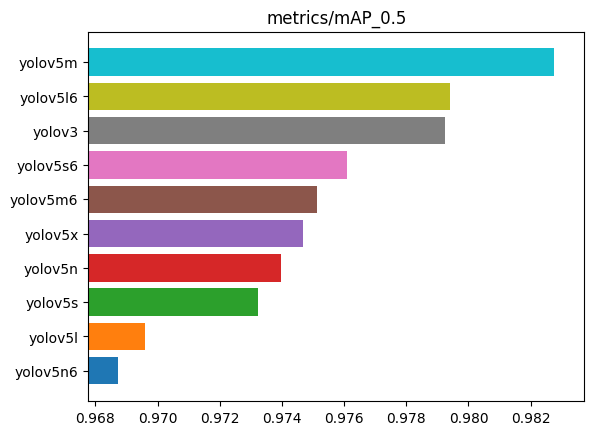

In [8]:
sort_and_plot(result, "metrics/mAP_0.5")

In [9]:
res = []

for i, (df, model, param) in enumerate(result):
    print(f"Load {model}")
    if model == "yolov3":
        macs = "78.04"
    else:
        net = torch.hub.load(f'ultralytics/{model[:len("yolov5")]}', model)
        macs, _ = get_model_complexity_info(net, (3, 640, 640), print_per_layer_stat=False)
    res += [(df, model, float(param), float(macs.split()[0]))]

Load yolov5n6


Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5n6 summary: 280 layers, 3239884 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU



Load yolov5l


Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 


Load yolov5s


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 


Load yolov5n


YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU



Load yolov5x


Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU



Load yolov5m6


Fusing layers... 
YOLOv5m6 summary: 378 layers, 35704908 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 


Load yolov5s6


YOLOv5s6 summary: 280 layers, 12612508 parameters, 0 gradients
Adding AutoShape... 


Load yolov3
Load yolov5l6


Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/aiel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-13 Python-3.9.13 torch-1.12.1 CPU



Load yolov5m


Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


In [10]:
def sort_and_plot_net_score(result, key):
    import matplotlib
    matplotlib.use('TkAgg')
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    model_name = []
    minimum = float("inf")
    maximum = -1.1
    
    result.sort(key=lambda df: float((df[0][key] * 100) ** 2 / df[2] ** 0.5 / df[3] ** 0.5))

    for i, (df, model, param, macs) in enumerate(result):
        minimum = min(minimum, float((df[key] * 100) ** 2 / param ** 0.5 / macs ** 0.5))
        maximum = max(maximum, float((df[key] * 100) ** 2 / param ** 0.5 / macs ** 0.5))
        plt.barh(i, (df[key] * 100) ** 2 / param ** 0.5 / macs ** 0.5)
        model_name += [model]

    plt.title(key)
    plt.yticks(range(len(model_name)), model_name)
    plt.xlim([minimum * 0.99, maximum * 1.01])
    plt.show()

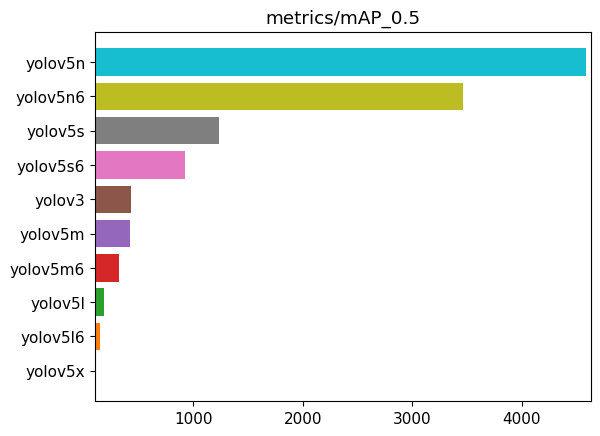

In [11]:
sort_and_plot_net_score(res, "metrics/mAP_0.5")

In [49]:
cfg = [
    ("high augmentation", "4g7c5j2x"),
    ("vertical flip", "3eo96j1p"),
    ("focal loss", "oycvlkcc"),
    ("mixup", "26qsmxw0"),
    ("rotate180", "2otmd1sj"),
    ("rotate90", "2otmd1sj"),
    ("base line", "1ojq3drs"),
    ("vertical+f1+mixup", "1j8se0ct"),
    ("f1+mixup", "rua53j3m"),
    ("vertical+mixup", "1vl7goai"),
    ("test", "3f5csrax")
]

model = []
for name, ids in cfg:
    df = get_log_from_id(ids, "Gripp")
    model += [(df, name)]

In [50]:
def sort_and_plot(result, key):
    import matplotlib
    matplotlib.use('TkAgg')
    import matplotlib.pyplot as plt
    %matplotlib inline
    minimum = float("inf")
    maximum = -1.1
    
    
    model_name = []
    result.sort(key=lambda df: float(df[0][key]))
    for i, (df, model) in enumerate(result):
        plt.barh(i, df[key])
        model_name += [model]
        maximum = max(maximum, float(df[key]))
        minimum = min(minimum, float(df[key]))

    plt.title(key)
    plt.yticks(range(len(model_name)), model_name)
    plt.xlim([minimum * 0.999, maximum * 1.001])
    plt.show()

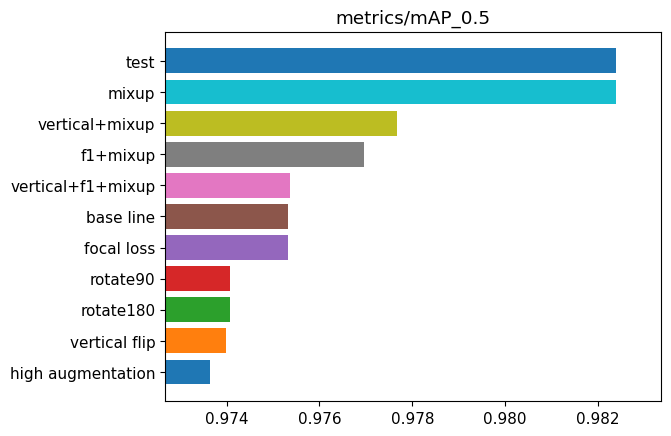

In [51]:
sort_and_plot(model, "metrics/mAP_0.5")

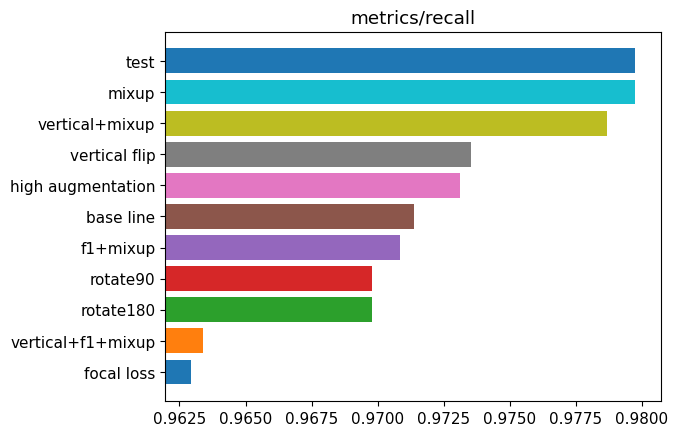

In [52]:
sort_and_plot(model, "metrics/recall")

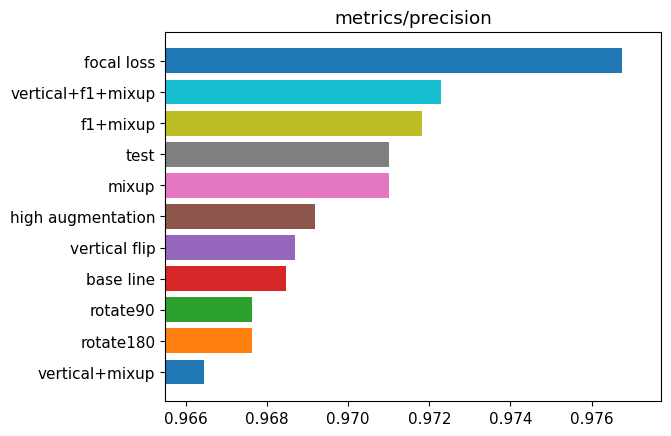

In [53]:
sort_and_plot(model, "metrics/precision")

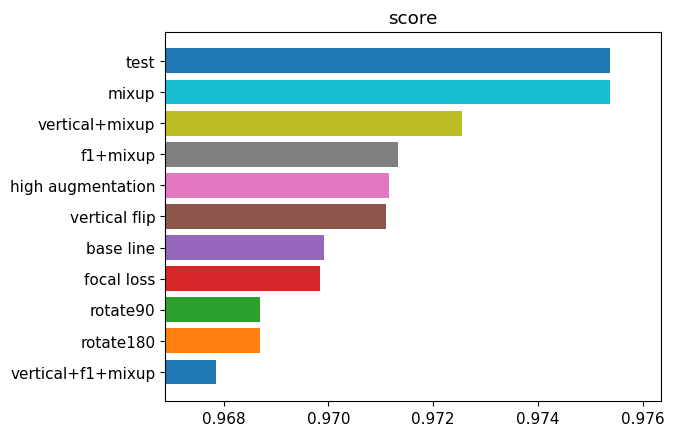

In [54]:
sort_and_plot(model, "score")